# Exploratory Data Analysis Using Youtube Video Data from BBC News

## 1.Introduction

YouTube is an American online video sharing and social media platform headquartered in San Bruno, California. It was launched on February 14, 2005, by Steve Chen, Chad Hurley, and Jawed Karim. It is currently owned by Google, and is the second most visited website, after Google Search. YouTube has more than 2.5 billion monthly users who collectively watch more than one billion hours of videos each day. As of May 2019, videos were being uploaded at a rate of more than 500 hours of content per minute.[1]

## 2. Dataset

The YouTube Data API (v3), which is used in this analysis, lets you incorporate YouTube functionality into your own application. You can use the API to fetch search results and to retrieve, insert, update, and delete resources like videos or playlists.[2]

In conjunction with the YouTube Player APIs and the YouTube Analytics API, the API lets your application provide a full-fledged YouTube experience that includes search and discovery, content creation, video playback, account management, and viewer statistics.[2]

Additionally; BBC News youtube channel created Apr 8, 2006. Has 12900000 subscribers and 16575 videos in total and their videos viewed 3902031696 times.

### What I covered in this analysis?

- Data Cleaning; including changing data types and replacing NaN and Null values with 0. 


- Enriching data; adding new columns by processing relevant columns. Also creating categorical data type to help grouping large amount of information.


- Basic statistics covered; max min and average values. Additionally the most interacted 9 videos plotted.


- To understand what is the relationship between view, like, comment, duration etc. scatterplot used and interpreted. Questions which are answered:



            
    1.Does the number of views and comments  have an effect on like number?


    2.Does video duration matter for video to get more likes and views?


    3.Does tag numbers affect to view counts?


    4.Does title length matter for views?


- The number of videos published are visualized by year, month, week and daily. 2 of the days with the highest number of videos published were determined and Natural language processing (NLP) was used to understand what event took place on these days. 


### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import calendar
from datetime import date
import isodate
import math
#data viz. libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
    # bokeh
from bokeh.io import output_file, show,  output_notebook
from bokeh.plotting import figure
from bokeh.models import NumeralTickFormatter
from bokeh.layouts import column

#NLTK
import re
import string
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from IPython.display import display_html



ModuleNotFoundError: No module named 'pandas'

# IMPORT CSV FILE

In [ ]:
pd.set_option('display.max_colwidth', -1)

/var/folders/4g/_fkh_sts2kvc493cdc8s9szm0000gn/T/ipykernel_4335/3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
df = pd.read_csv('/Users/user/Documents/BBC News Youtube Data/BBC_NEWS.csv',
                 lineterminator='\n')


In [ ]:
df.tail(10)

,Unnamed: 0,video_id,channel_title,video_title,tags,publishedAt,view_count,like_count,favoriteCount,commentCount,duration,definition,caption,description
16566,16566,KtarVns7wJU,BBC News,CHINA MAN GROWS A NOSE ON HIS FOREHEAD BBC NEWS,"['China', 'nose', 'china nose', 'man grows nose on his forehead', 'forehead', 'medicine', 'medical first', 'news', 'bbc', 'bbc news', 'amazing']",2013-09-25,14503.0,120.0,0,38.0,PT52S,sd,False,"Subscribe to BBC News www.youtube.com/bbcnews\nAn almost unbelievable story from the Fujian province in China where a man has had a new nose grown on his forehead. The 22 year-old man damaged his nose in a traffic accident in August two thousand and twelve but failed to seek treatment. This lead to an infection, meaning surgeons were unable to save his nose. Instead, in a medical first, they've grown a new one on his forehead, using exisitng skin and cartilege from one of his ribs. Doctors say the final stage, actually transplanting it, will take place ""soon"".\n\nSubscribe http://www.youtube.com/bbcnews\n\nCheck out our website: http://www.bbc.com/news \nFacebook: http://www.facebook.com/bbcworldnews \nTwitter: http://www.twitter.com/bbcworld\nInstagram: http://instagram.com/bbcnews"
16567,16567,TKIX8RaQjgY,BBC News,AMAZING BOULDER ESCAPE CAUGHT ON CAMERA - BBC NEWS,"['taiwan', 'boulder', 'taiwan boulder', 'escape', 'survival', 'amazing escape', 'lucky', 'driver', 'caught on camera', 'AND FINALLY']",2013-09-02,1576.0,24.0,0,2.0,PT26S,sd,False,Subscribe to BBC News www.youtube.com/bbcnews\nWathc this amazing escape for one lucky driver in Taiwan who's brush with death was caught on camera. It all takes place in the middle of a tropical storm and involves a rather large boulder which the motorist is unlikely to forget.\n\nSubscribe http://www.youtube.com/bbcnews\n\nCheck out our website: http://www.bbc.com/news \nFacebook: http://www.facebook.com/bbcworldnews \nTwitter: http://www.twitter.com/bbcworld\nInstagram: http://instagram.com/bbcnews
16568,16568,VeSoMDEA7z0,BBC News,SYRIA DEPUTY FM FAISAL MEKDAD INTERVIEW BBC NEWS,"['syria', 'syria conflict', 'interview', 'bbc', 'bbc news', 'syria deputy foreign minister', 'Faisal Meqdad (Person)', 'meqdad', 'mekdad', 'faisal mekdad', 'jeremy bowen']",2013-09-02,1317.0,NaN,0,NaN,PT53S,sd,False,Subscribe to BBC News www.youtube.com/bbcnews\nSyria's Deputy Foreign minister tells the BBC that US military action would have dire consequences for the region. He also denied that the Syrian government is responsible for the use of chemical weapons. For the full interview visit our website.\n\nSubscribe http://www.youtube.com/bbcnews\n\nCheck out our website: http://www.bbc.com/news \nFacebook: http://www.facebook.com/bbcworldnews \nTwitter: http://www.twitter.com/bbcworld\nInstagram: http://instagram.com/bbcnews
16569,16569,Us6SVEsRK1k,BBC News,GIANT WAVES BATTER CHINA - BBC NEWS,"['china', 'British Broadcasting Corporation Business Operation', 'bbc news', 'china wave', 'news', 'bbc', 'giant wave', 'china giant wave', 'wave', 'amazing', 'and finally']",2013-08-23,2647.0,22.0,0,6.0,PT33S,sd,False,"Subscribe to BBC News www.youtube.com/bbcnews\nWatch huge waves battering the Zhejiang province in China. Waves as high as 20 metres were recorded by the local observation station as it crashed along the banks of the river near the city of Haining, setting the highest record in a decade. The huge tide destroyed the protection net along the banks and is thought to have become more powerful due to the impact of the typhoon.\n\nSubscribe http://www.youtube.com/bbcnews\n\nCheck out our website: http://www.bbc.com/news \nFacebook: http://www.facebook.com/bbcworldnews \nTwitter: http://www.twitter.com/bbcworld\nInstagram: http://instagram.com/bbcnews"
16570,16570,GBQ604MWZTQ,BBC News,ALLEGGED SYRIA TOXIC ATTACKS - BBC NEWS,"['syria', 'syria chemical attack', 'syria crisis', 'chemical attack', 'toxic', 'toxic attack', 'news', 'bbc news syria', 'syria news']",2013-08-22,3098.0,37.0,0,5.0,

# DATA CLEANING 

## DEPRECATION

### DROP IRRELEVANT COLUMNS

In [ ]:
df = df.drop (['Unnamed: 0'], axis = 1)

In [ ]:
df.dtypes

video_id         object 
channel_title    object 
video_title      object 
tags             object 
publishedAt      object 
view_count       float64
like_count       float64
favoriteCount    int64  
commentCount     float64
duration         object 
definition       object 
caption          bool   
description      object 
dtype: object

In [ ]:
for x in df["favoriteCount"]:
    if x == 0:
        print(x)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
df.drop(['favoriteCount'],axis =1 ,inplace =True)

## FIX

### REPLACE NAN VALUES TO 0

In [ ]:
pd.isna(df).sum()

video_id         0  
channel_title    0  
video_title      0  
tags             32 
publishedAt      0  
view_count       1  
like_count       48 
commentCount     388
duration         0  
definition       0  
caption          0  
description      0  
dtype: int64

In [ ]:
df.isnull().any()


video_id         False
channel_title    False
video_title      False
tags             True 
publishedAt      False
view_count       True 
like_count       True 
commentCount     True 
duration         False
definition       False
caption          False
description      False
dtype: bool

In [ ]:
df.fillna(0,inplace=True)

## CHANGE

### FORMAT DURATION COLUMN DATA TYPE : TIMEDELTA TO MINUTES

In [ ]:
index = len(df)
for i in range(index):
    a = df.loc[i,'duration']
    dur = isodate.parse_duration(a)
    dur = math.ceil(dur.total_seconds()/60)
    #dur = dur.total_seconds()
    df.loc[i,'duration'] = dur

### Convert view_count,like_count and duration dtypes to int and publishedAt to datetime64

In [ ]:
df.dtypes

video_id         object 
channel_title    object 
video_title      object 
tags             object 
publishedAt      object 
view_count       float64
like_count       float64
commentCount     float64
duration         object 
definition       object 
caption          bool   
description      object 
dtype: object

In [ ]:
df['view_count'] = df['view_count'].astype(int)
df['like_count'] = df['like_count'].astype(int)
df['commentCount'] = df['commentCount'].astype(int)
df['duration'] = df['duration'].astype(int)
df = df.astype({'publishedAt': 'datetime64[ns]'})

# PREPROCESSING

## Enriching data

tagsCount, titleLength, durationCategory, tagCategory, likePercentage and commentPercentage added for further analyze.

In [ ]:
tags = df['tags'].str.count(',').add(1).groupby(df.video_id).sum().astype(int).reset_index(name='tagsCount')
df= df.merge(tags, how='left', on='video_id')

In [ ]:
title = df['video_title'].str.count(' ').add(0).groupby(df.video_id).sum().astype(int).reset_index(name='titleLength')
df= df.merge(title, how='left', on='video_id')

In [ ]:
df['publishedDay'] = pd.Series(df.publishedAt).dt.day_name()

In [ ]:
df['like_prc'] = round(df['like_count']/df['view_count']*100,1)
df['comment_prc'] = round(df['commentCount']/df['view_count']*100,1)

In [ ]:
# create a list of our conditions
conditions = [
    (df['duration'] <= 2),
    (df['duration'] > 2) & (df['duration'] <= 5),
    (df['duration'] > 5) & (df['duration'] <= 10),
    (df['duration'] > 10)
    ]

# create a list of the values we want to assign for each condition
values = ['below 2min', 'between 2min and 5min', 'between 5min and 10min', 'more than 10min']

# create a new column and use np.select to assign values to it using our lists as arguments
df['durationCategory'] = np.select(conditions, values)
df['durationCategory'] = pd.Categorical(df['durationCategory'], categories=['below 2min', 'between 2min and 5min', 
                                                                            'between 5min and 10min', 'more than 10min'], ordered=True)
# display updated DataFrame
df.head()

,video_id,channel_title,video_title,tags,publishedAt,view_count,like_count,commentCount,duration,definition,caption,description,tagsCount,titleLength,publishedDay,like_prc,comment_prc,durationCategory
0,jH_JCf8yNxc,BBC News,Chinese motorcyclists join wildfire battle – BBC News,"['bbc', 'bbc news', 'news']",2022-09-05,6615,157,43,3,hd,False,"A record-long heatwave and drought have triggered wildfires that have raged across areas of China throughout August, with thousands of firefighters were mobilised across the country.\n\nAround the south-western city of Chongqing, one of the worst-hit areas, local off-road motorcyclists have joined the effort, transporting emergency workers and essential supplies to areas that were otherwise hard to reach. \n\nSome of the volunteers have been speaking about their efforts to help and coming face to face with the effects of climate change.\n\nPlease subscribe HERE http://bit.ly/1rbfUog\n\n#China #Widlfires #BBCNews",3,7,Monday,2.4,0.7,between 2min and 5min
1,wE4sLU2651E,BBC News,Canada police hunt suspects over stabbing rampage – BBC News,"['bbc', 'bbc news', 'news']",2022-09-05,5566,136,0,4,hd,False,"Canadian police have launched a huge manhunt for two men suspected of stabbing at least 10 people to death in a rampage in the province of Saskatchewan that has shocked the nation.\n\nTwo suspects named as Damien Sanderson and Myles Sanderson are on the run and considered armed and dangerous.\n\nVictims were found in 13 locations in the remote indigenous community James Smith Cree Nation and nearby Weldon.\n\nIt is of the deadliest acts of mass violence Canada has seen. PM Justin Trudeau said it was ""heartbreaking"".\n\nPlease subscribe HERE http://bit.ly/1rbfUog\n\n#Canada #Saskatchewan #BBCNews",3,9,Monday,2.4,0.0,between 2min and 5min
2,G_DVY9Pd6Tg,BBC News,Pakistan army leads flood rescue missions - BBC News,"['bbc', 'bbc news', 'news', 'Pakistan', 'floods', 'flooding', 'disaster', 'dead', 'homes', 'destroyed', 'disease', 'homeless', 'water', 'climate', 'change', 'global', 'warming', 'emissions', 'rich', 'wealthy', 'nations', 'countries', 'aid', 'help', 'support', 'appeal', 'reparations', 'aftermath', 'lives', 'province', 'Balochistan', 'Islamabad']",2022-09-04,65559,1508,644,3,hd,False,"Pakistan is calling on rich nations to pay reparations to help poorer countries deal with climate change. \n\nIt comes as Pakistan struggles to cope with the aftermath of devastating flooding which has claimed more than 1,200 lives and left a third of the country under water. \n\nPakistan’s Balochistan province is one of the worst hit areas and the army has been leading rescue efforts there. \n\nClive Myrie presents BBC News at Ten reporting from Balochistan by Farhat Javed.\n\nPlease subscribe HERE http://bit.ly/1rbfUog\n\n#BBCNews",32,8,Sunday,2.3,1.0,between 2min and 5min
3,5Qf57h1wCjo,BBC News,New ticketless transport tracks where you go via Bluetooth - BBC News,"['bbc', 'bbc news', 'news']",2022-09-04,34945,565,248,5,hd,False,"Contactless payments have become commonplace, but one Italian city has taken it one step forward across its transport network, as BBC Click has found out.\n\nIn Genoa, Bluetooth beacons dotted across the city track the journeys that passengers make.\n\nIt means that buses, boats and trains can all be used without the need to tap or swipe a ticket machine, as the technology tracks journeys, and calculates a fare at the end of the day.\n\nData gathered is even being used to monitor emissions across the city – and determine which services are busiest at any given time.\n\nPlease subscribe HERE http://bit.ly/1rbfUog\n\n#Genoa #Technology #BBCNews",3,11,Sunday,1.6,0.7,between 2min and 5min
4,jDc2lYJ6rJ0,BBC News,"Vanishing glaciers threaten Europe's water supply, says study – BBC News","['bbc', 'bbc news', 'news', 'glaciers', 'Europe', 'Climate Change', 'water supply', 'Switzerland']",2022-09-04,54270,877,376,3,hd,False,"Switzerland's glaciers have lost more than half their volume in l

In [ ]:
# create a list of our conditions
conditions = [
    (df['tagsCount'] >= 0) & (df['tagsCount'] <= 10),
    (df['tagsCount'] > 10) & (df['tagsCount'] <= 20),
    (df['tagsCount'] > 20) & (df['tagsCount'] <= 30),
    (df['tagsCount'] > 30) &  (df['tagsCount'] <= 40),
    (df['tagsCount'] > 40) &  (df['tagsCount'] <= 50),
    (df['tagsCount'] > 50) &  (df['tagsCount'] <= 60),
    (df['tagsCount'] > 60) &  (df['tagsCount'] <= 70),
    (df['tagsCount'] > 70)  ]

# create a list of the values we want to assign for each condition
values = ['between 0&10','between 10&20', 'between 20&30', 'between 30&40', 'between 40&50', 'between 50&60','between 60&70','more than 70']

# create a new column and use np.select to assign values to it using our lists as arguments
df['tagCategory'] = np.select(conditions, values)
df['tagCategory'] = pd.Categorical(df['tagCategory'], categories=['between 0&10','between 10&20', 'between 20&30', 'between 30&40', 
                                                                    'between 40&50', 'between 50&60','between 60&70','more than 70'],ordered=True)
# display updated DataFrame
df.head()

,video_id,channel_title,video_title,tags,publishedAt,view_count,like_count,commentCount,duration,definition,caption,description,tagsCount,titleLength,publishedDay,like_prc,comment_prc,durationCategory,tagCategory
0,jH_JCf8yNxc,BBC News,Chinese motorcyclists join wildfire battle – BBC News,"['bbc', 'bbc news', 'news']",2022-09-05,6615,157,43,3,hd,False,"A record-long heatwave and drought have triggered wildfires that have raged across areas of China throughout August, with thousands of firefighters were mobilised across the country.\n\nAround the south-western city of Chongqing, one of the worst-hit areas, local off-road motorcyclists have joined the effort, transporting emergency workers and essential supplies to areas that were otherwise hard to reach. \n\nSome of the volunteers have been speaking about their efforts to help and coming face to face with the effects of climate change.\n\nPlease subscribe HERE http://bit.ly/1rbfUog\n\n#China #Widlfires #BBCNews",3,7,Monday,2.4,0.7,between 2min and 5min,between 0&10
1,wE4sLU2651E,BBC News,Canada police hunt suspects over stabbing rampage – BBC News,"['bbc', 'bbc news', 'news']",2022-09-05,5566,136,0,4,hd,False,"Canadian police have launched a huge manhunt for two men suspected of stabbing at least 10 people to death in a rampage in the province of Saskatchewan that has shocked the nation.\n\nTwo suspects named as Damien Sanderson and Myles Sanderson are on the run and considered armed and dangerous.\n\nVictims were found in 13 locations in the remote indigenous community James Smith Cree Nation and nearby Weldon.\n\nIt is of the deadliest acts of mass violence Canada has seen. PM Justin Trudeau said it was ""heartbreaking"".\n\nPlease subscribe HERE http://bit.ly/1rbfUog\n\n#Canada #Saskatchewan #BBCNews",3,9,Monday,2.4,0.0,between 2min and 5min,between 0&10
2,G_DVY9Pd6Tg,BBC News,Pakistan army leads flood rescue missions - BBC News,"['bbc', 'bbc news', 'news', 'Pakistan', 'floods', 'flooding', 'disaster', 'dead', 'homes', 'destroyed', 'disease', 'homeless', 'water', 'climate', 'change', 'global', 'warming', 'emissions', 'rich', 'wealthy', 'nations', 'countries', 'aid', 'help', 'support', 'appeal', 'reparations', 'aftermath', 'lives', 'province', 'Balochistan', 'Islamabad']",2022-09-04,65559,1508,644,3,hd,False,"Pakistan is calling on rich nations to pay reparations to help poorer countries deal with climate change. \n\nIt comes as Pakistan struggles to cope with the aftermath of devastating flooding which has claimed more than 1,200 lives and left a third of the country under water. \n\nPakistan’s Balochistan province is one of the worst hit areas and the army has been leading rescue efforts there. \n\nClive Myrie presents BBC News at Ten reporting from Balochistan by Farhat Javed.\n\nPlease subscribe HERE http://bit.ly/1rbfUog\n\n#BBCNews",32,8,Sunday,2.3,1.0,between 2min and 5min,between 30&40
3,5Qf57h1wCjo,BBC News,New ticketless transport tracks where you go via Bluetooth - BBC News,"['bbc', 'bbc news', 'news']",2022-09-04,34945,565,248,5,hd,False,"Contactless payments have become commonplace, but one Italian city has taken it one step forward across its transport network, as BBC Click has found out.\n\nIn Genoa, Bluetooth beacons dotted across the city track the journeys that passengers make.\n\nIt means that buses, boats and trains can all be used without the need to tap or swipe a ticket machine, as the technology tracks journeys, and calculates a fare at the end of the day.\n\nData gathered is even being used to monitor emissions across the city – and determine which services are busiest at any given time.\n\nPlease subscribe HERE http://bit.ly/1rbfUog\n\n#Genoa #Technology #BBCNews",3,11,Sunday,1.6,0.7,between 2min and 5min,between 0&10
4,jDc2lYJ6rJ0,BBC News,"Vanishing glaciers threaten Europe's water supply, says study – BBC News","['bbc', 'bbc news', 'news', 'glaciers', 'Europe', 'Climate Change', 'water supply', 'Switzerland']",2022-09-04,54270,877,376,3,hd,False,"

# STATISTICS

## Get video statistics

 16576 video processed as seen in below.

In [ ]:
total_view = df['view_count'].sum()
avg_view = round(df['view_count'].mean(),1)
max_view = df['view_count'].max()
min_view= df['view_count'].min()
total_like = df['like_count'].sum()
avg_like = round(df['like_count'].mean(),1)
max_like = df['like_count'].max()
min_like= df['like_count'].min()
total_comment = df['commentCount'].sum()
avg_comment= round(df['commentCount'].mean(),1)
max_comment= df['commentCount'].max()
min_comment = df['commentCount'].min()
total_duration = df['duration'].sum()
avg_duration = round(df['duration'].mean(),1)
max_duration= df['duration'].max()
min_duration = df['duration'].min()
StatsBBC = pd.DataFrame({'Total': [total_view,total_like,total_comment,total_duration], 
                        'Average': [avg_view,avg_like,avg_comment,avg_duration],
                         'Max'   :        [max_view, max_like,max_comment, max_duration],
                           'Min'  :       [min_view, min_like, min_comment, min_duration]}, 
                                    index=[['View','Like', 'Comment', 'Duration(min)']])
StatsBBC


,Total,Average,Max,Min
View,3902931661,235456.8,65599815,0
Like,41041417,2476.0,1079504,0
Comment,13729905,828.3,144935,0
Duration(min),76401,4.6,213,0


Further exploration as evidence; 
- most of the videos have duration between 2min and 5min.


- most of the videos have tags between 0 to 10.

In [ ]:
df["durationCategory"].mode()

0    between 2min and 5min
Name: durationCategory, dtype: category
Categories (4, object): ['below 2min' < 'between 2min and 5min' < 'between 5min and 10min' < 'more than 10min']

Most of the videos have tags between 0 to 10.

In [ ]:
df["tagCategory"].mode()

0    between 0&10
Name: tagCategory, dtype: category
Categories (8, object): ['between 0&10' < 'between 10&20' < 'between 20&30' < 'between 30&40' < 'between 40&50' < 'between 50&60' < 'between 60&70' < 'more than 70']

Correlation between like and view count is the highest, followed by comment count-view count, and comment count-like count. To see these relationships closely, let's set a hypothesis and plot the data.

<AxesSubplot:>

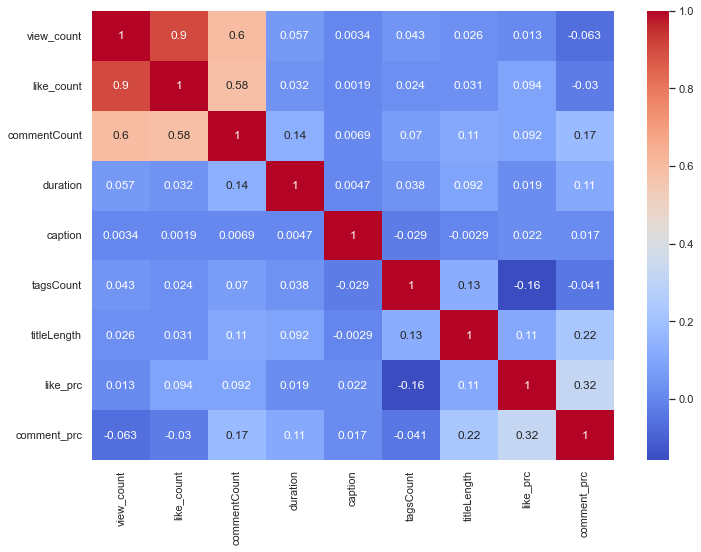

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

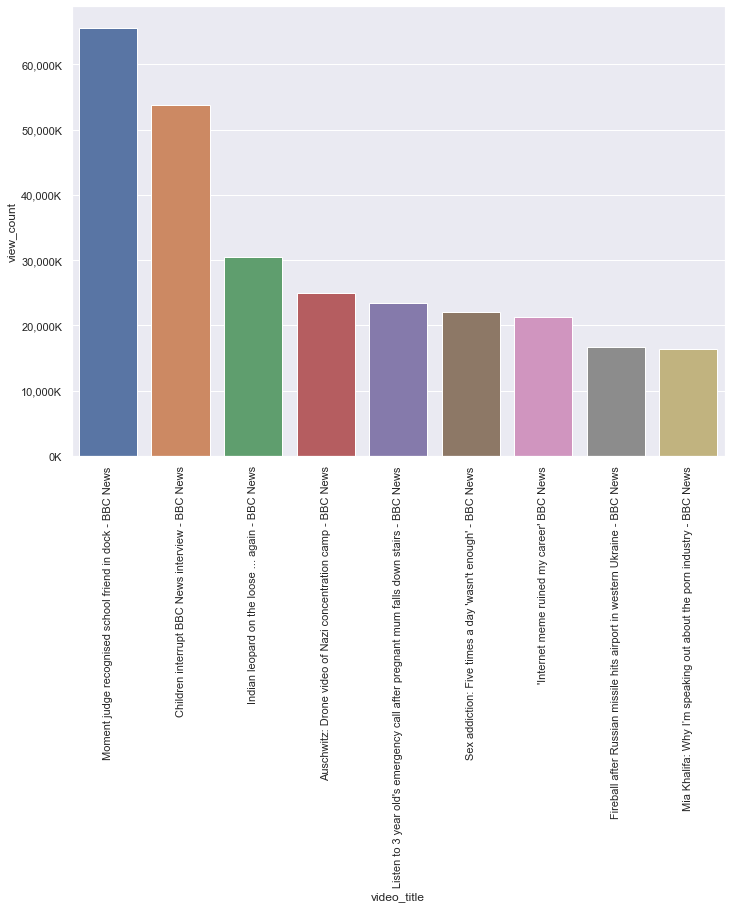

In [ ]:
ax = sns.barplot(x = 'video_title', y = 'view_count', data = df.sort_values('view_count', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

## Questions : 

### 1:  Does the number of views and comments  have an effect on like number?

It is obvious in correlation table that views and likes has strong correlation. The graphs below explain that relationship clearly; the more view and comment a video get, the more likely this video gets like. 

<AxesSubplot:xlabel='commentCount', ylabel='view_count'>

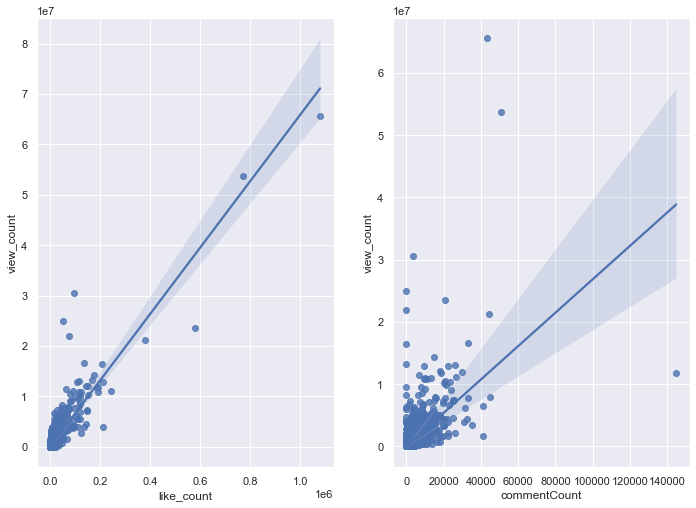

In [ ]:
fig, ax =plt.subplots(1,2)
sns.regplot(data=df ,x="like_count", y="view_count", ax=ax[0])
sns.regplot(data=df ,x="commentCount", y="view_count", ax=ax[1])

However when we plot the percentage (like and comment divided by view) the correlation is less clear. The relationship between like and view is not strong enough. The videos which have high views, have lower like ration while some videos have a small number of view but higher like percentage. 

In terms of view-comment correlation we can still pinpoint positive correlation (though insignificant) which means that the more views a video has, the more people write down a comment. This is understandable that, on news channel people are tend to write a comment, share an opinion than hit the like button.

<AxesSubplot:xlabel='comment_prc', ylabel='view_count'>

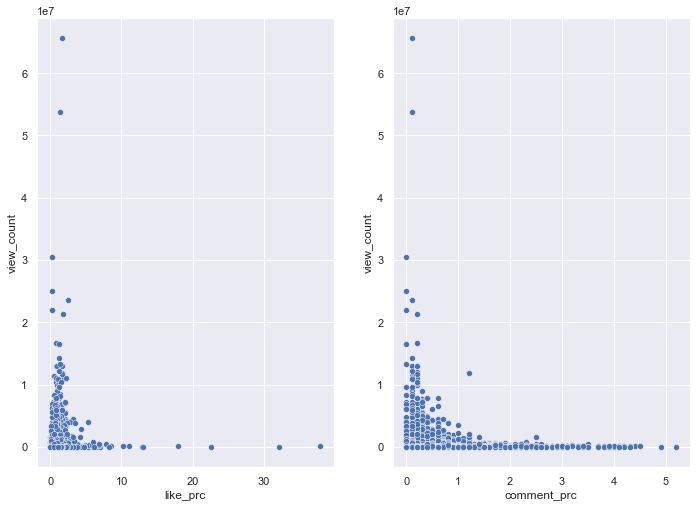

In [ ]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data=df ,x="like_prc", y="view_count", ax=ax[0])
sns.scatterplot(data=df ,x="comment_prc", y="view_count", ax=ax[1])

### 2: Does video duration matter for video to get more likes and views?

Shorter videos have more views and likes than longer videos. Overall, there is no positive correlation between duration and interactions with videos.

<AxesSubplot:xlabel='duration', ylabel='like_count'>

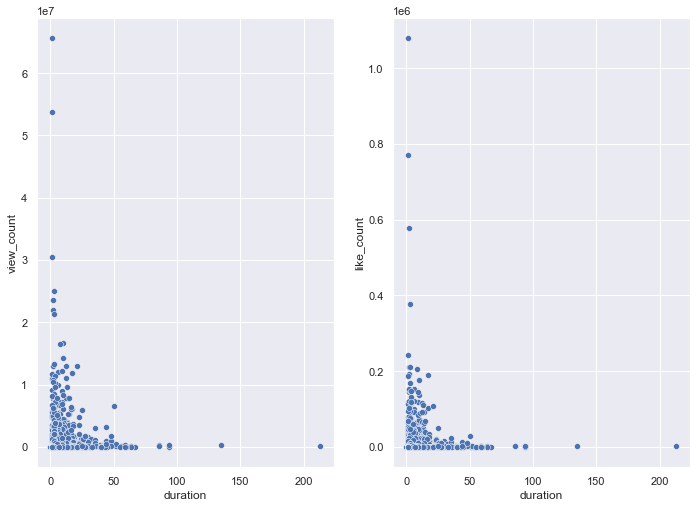

In [ ]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = df, x = "duration", y = "view_count", ax=ax[0])
sns.scatterplot(data = df, x = "duration", y = "like_count", ax=ax[1])

- To get more details, let's create new table with durationCategory and graphs that show relationships between view, comment and like numbers.

In [ ]:
df_duration=df.copy()
df_duration=df_duration.groupby(["durationCategory"]).agg({"view_count":"sum","like_count":"sum","commentCount":"sum"}).reset_index()
df_duration.columns=["durationCategory","view_count","like_count","comment_count"]
df_duration=df_duration.sort_values(by=["durationCategory"])
df_duration.reset_index(inplace=True,drop=True)
df_duration

,durationCategory,view_count,like_count,comment_count
0,below 2min,950033470,10130918,1855889
1,between 2min and 5min,1512983711,16467044,5815377
2,between 5min and 10min,920087541,9700063,3963851
3,more than 10min,519826939,4743392,2094788


In [ ]:

output_notebook()
colors = ["#c9d9d3", "#718dbf"]
duration = df_duration["durationCategory"].to_list()
a =["like_count","comment_count"]
view = df_duration["view_count"].to_list()


p= figure(x_range=duration, height=250, title="Total View Count per Duration Category",
           toolbar_location=None, tools="")

p.vbar(x=duration, top=view, width=0.9)

p.yaxis[0].formatter = NumeralTickFormatter(format="0,0")
p.xgrid.grid_line_color = None
p.y_range.start = 0

#stacked bar chart

p1 = figure(x_range=duration, height=250, title="Total Like and Comment by Duration Category",
           toolbar_location=None, tools="")

p1.vbar_stack(a, x='durationCategory', width=0.9, color=colors, source=df_duration,legend_label=a)

p1.y_range.start = 0
p1.yaxis[0].formatter = NumeralTickFormatter(format="0,0")

#p2.x_range.range_padding = 10000
p1.xgrid.grid_line_color = None
p1.axis.minor_tick_line_color = None
p1.outline_line_color = None
p1.legend.location = "top_right"
p1.legend.orientation = "horizontal"
show(column(p,p1))


Loading BokehJS ...

As can be seen most viewed videos have video time between 2 to 5 minutes. And also most liked and commented videos are in the same category. And like numbers are lower than comments in every duration category.

### 3: Does tag numbers affect to view counts?

To insight into the tags, let's create new table and add together view counts by tag category.

In [ ]:
df_tags=df.copy()
df_tags=df_tags.groupby(["tagCategory"]).agg({"view_count":"sum"}).reset_index()
df_tags.columns=["tagCategory","view_count"]
df_tags=df_tags.sort_values(by=["tagCategory"])
df_tags.reset_index(inplace=True,drop=True)
df_tags


,tagCategory,view_count
0,between 0&10,1692509747
1,between 10&20,1172872281
2,between 20&30,555108235
3,between 30&40,132694351
4,between 40&50,98243600
5,between 50&60,106588572
6,between 60&70,131701489
7,more than 70,13213386


#

It is obvious that tag numbers do not have any effect in view numbers. Videos, which have high views, have tag numbers between 0 to 10.

In [ ]:

output_notebook()
tags = df_tags["tagCategory"].to_list()
view = df_tags["view_count"].to_list()


p= figure(x_range=tags, height=250, title="Total Number of Views According to The Number of Tags",
           toolbar_location=None, tools="")

p.vbar(x=tags, top=view ,width=0.9)

p.yaxis[0].formatter = NumeralTickFormatter(format="0,0")
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1

#stacked bar chart


show(p)


Loading BokehJS ...

### 4: Does title length matter for views?


The scatterplot shows that, there is no clear correlation between title length and view count. Most viewed videos have around 10 characters.

<AxesSubplot:xlabel='titleLength', ylabel='view_count'>

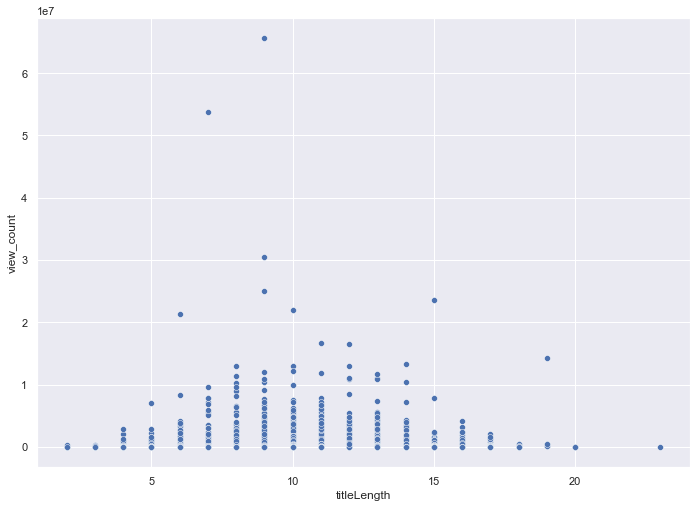

In [ ]:
sns.scatterplot(data = df, x = "titleLength", y = "view_count")

## Distribution of video published by date

- Yearly

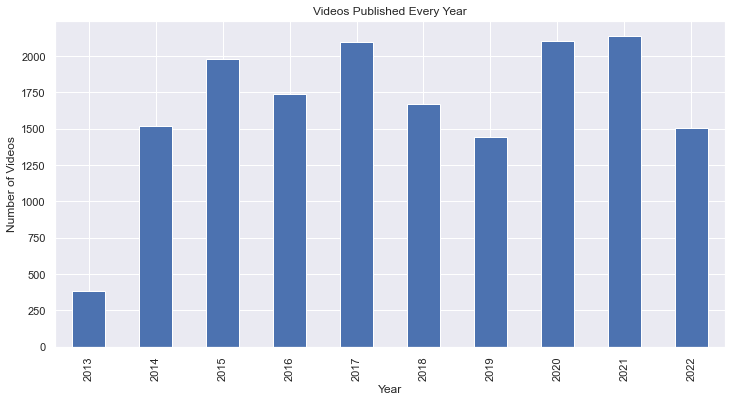

In [ ]:
ax = df.groupby(df.publishedAt.dt.year)['video_id'].count().plot(kind='bar', figsize=(12, 6))
ax.set(xlabel='Year', ylabel='Number of Videos', title="Videos Published Every Year")
plt.show()

- Monthly

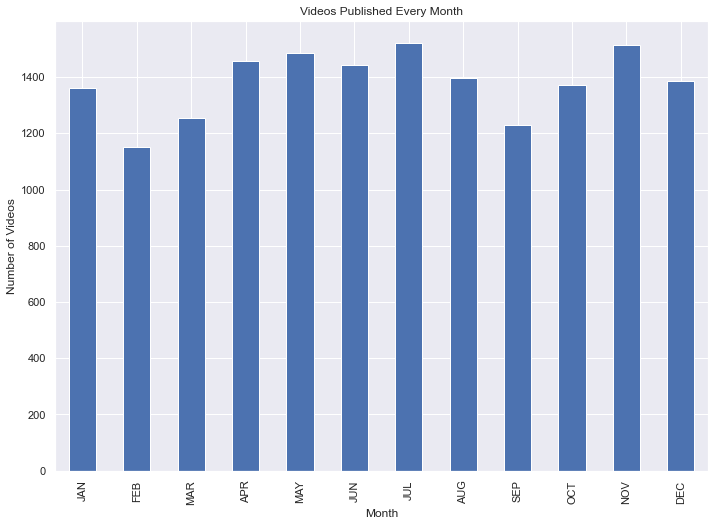

In [ ]:
ax = df.groupby(df.publishedAt.dt.month)['video_id'].count().plot(kind='bar')
months = ['JAN',  'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
ax.set_xticklabels(months)
ax.set(xlabel='Month', ylabel='Number of Videos', title="Videos Published Every Month")
plt.show()

- Daily

Video publish routine is crassly similar on weekdays, the busiest day is Wednesday around 2,700 videos. As expected, a very less number of videos are published on weekends. Saturday has the lowest number of video published, just below 1,500 videos  followed by Sunday with a small difference just over 1,500 videos.

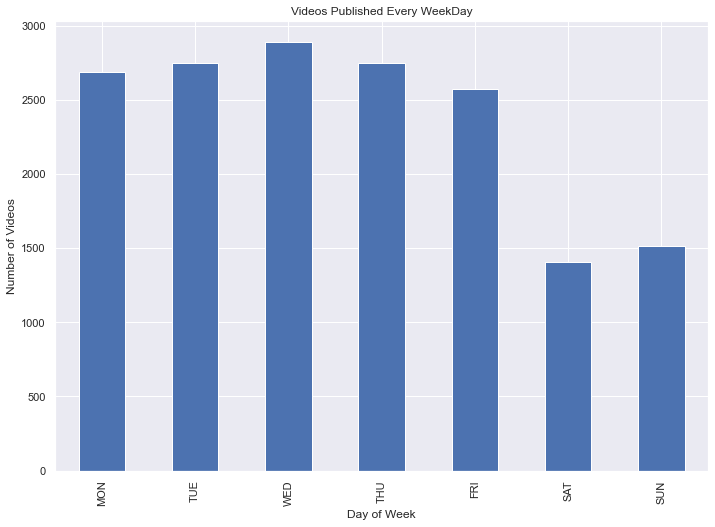

In [ ]:
ax = df.groupby(df.publishedAt.dt.weekday)['video_id'].count().plot(kind='bar')
days_of_week = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
ax.set_xticklabels(days_of_week)
ax.set(xlabel='Day of Week', ylabel='Number of Videos', title="Videos Published Every WeekDay")
plt.show()

- Highest number of videos published in the year 2021 and lowest in 2013.


- July and November shares the place that the higher number of videos published. All other months hover around same figures between 1200 to 1400 videos, except February just below 1200.


- Wednesday is the busiest day in the week.



## What is the day which has the highest numbers of videos published? What was the occasion?

As we see, when we count number of video published by day, we can see 24.10.2013 the highest at 36 videos and  followed by 13.12.2029 with 20 videos. If we remove these two days and plot the data we can have a clear understanding about general trend.

In [ ]:
df['publishedAt'].value_counts().head(10)

2013-10-24    36
2019-12-13    20
2013-11-08    17
2018-05-19    16
2017-09-15    16
2017-07-07    16
2016-11-09    15
2015-04-16    15
2021-01-20    15
2020-07-15    14
Name: publishedAt, dtype: int64

Generally number of videos released have been scattered around 2 to 10 videos each day with many exceptions every year. With using Natural Language Toolkit(nltk), we will identify the trends, which showed irregularity, by using the video_title and description columns throughout the period.

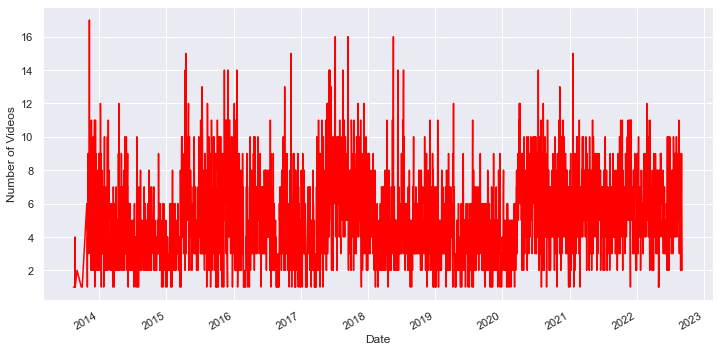

In [ ]:
ax = df['publishedAt'].value_counts()[2:].plot(color='red', figsize=(12,6))
ax.set(xlabel='Date', ylabel='Number of Videos')
plt.show()

## World analysis with NLTK on 2013-10-24 

In [ ]:
import re
import string
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from IPython.display import display_html


STOP_WORDS = stopwords.words("english")
new_stopwords = ["bbc", "news","new","subscribe","check","facebook","twitter","instagram","world"," year","sec","look","sinc","websit"]
STOP_WORDS.extend(new_stopwords)

def cleaning(text):
    """
    Convert to lowercase.
    Remove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    #remove numbers
    text = re.sub(r'\d+', '', text)
     # take main stem of each word
    ps = PorterStemmer()

    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [
        ps.stem(word) for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text


if __name__ == "__main__":
    max_rows = None # 'None' to read whole file
    dt = df[df.publishedAt=='2013-10-24']['video_title'].apply(str).apply(cleaning)
    dt_1 = df[df.publishedAt=='2013-10-24']['description'].apply(str).apply(cleaning)

    word_count = Counter(" ".join(dt).split()).most_common(10)
    word_count_ds = Counter(" ".join(dt_1).split()).most_common(10)

    word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
    word_frequency_ds = pd.DataFrame(word_count_ds, columns = ['Word', 'Frequency'])
  
    # display 2 DataFrame side by side
    df1_styler = word_frequency.style.set_table_attributes("style='display:inline'").set_caption('Title Word Frequency')
    df2_styler = word_frequency_ds.style.set_table_attributes("style='display:inline'").set_caption('Description Word frequency')

    display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)
    


,Word,Frequency
0,women,5
1,interview,4
2,india,2
3,year,2
4,war,2
5,us,2
6,russia,2
7,migrant,2
8,syrian,2
9,australian,2


When we do a little bit research, can be easily find out that BBC News channel shared a series which has named 100 Women on 24.10.2013, this explains frequency of 'women' and 'woman' words. Additionally there was wild fires in Australia

## World analysis with NLTK on 2019-12-13

In [ ]:
STOP_WORDS = stopwords.words("english")
new_stopwords = ["bbc", "news","new","subscribe","check","facebook","twitter","instagram","world"," year","sec","look","sinc","websit"]
STOP_WORDS.extend(new_stopwords)

def cleaning(text):
    """
    Convert to lowercase.
    Remove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)



    #text = re.sub('\s+', ' ', text).strip()

    #remove numbers
    text = re.sub(r'\d+', '', text)
     # take main stem of each word
    ps = PorterStemmer()

    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [
        ps.stem(word) for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text


if __name__ == "__main__":
    max_rows = None # 'None' to read whole file
    dt = df[df.publishedAt=='2019-12-13']['video_title'].apply(str).apply(cleaning)
    dt_1 = df[df.publishedAt=='2019-12-13']['description'].apply(str).apply(cleaning)

    word_count = Counter(" ".join(dt).split()).most_common(10)
    word_count_ds = Counter(" ".join(dt_1).split()).most_common(10)

    word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
    word_frequency_ds = pd.DataFrame(word_count_ds, columns = ['Word', 'Frequency'])
  
    # display 2 DataFrame side by side
    df1_styler = word_frequency.style.set_table_attributes("style='display:inline'").set_caption('Title Word Frequency')
    df2_styler = word_frequency_ds.style.set_table_attributes("style='display:inline'").set_caption('Description Word frequency')

    display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)
    


,Word,Frequency
0,elect,15
1,result,15
2,johnson,6
3,bori,5
4,conserv,5
5,win,3
6,major,3
7,jeremi,3
8,corbyn,3
9,swinson,3


As we dive into the news on 2019-12-13, we can see there was election in The UK. Boris Johnson's Conservative Party has won a clear majority in the general election, Labour Party (Jeremy Corbyn is the leader) produced the worst results since from 1935. Additionally BBC News declare that Boris Johnson gave a promise about get Brexit done by the end of January next year.And lastly Liberal Democratic leader Jo Swinson lost her seat after election, this is explains 'seat', 'swinson' words.

## Conclusion 

In this project, I explored BBC News Youtube Channel and showed revealing information about how one of the most known news source perform on Youtube.


Overall, analysis indicates that more view brings more like and comment, contrary to ordinary comment numbers are higher than likes and have a higher correlation with a view like. This is understandable that the audience tends to discuss daily topics in the comment section instead of liking the video. Turning to the duration, between 2 and 5 min duration category has the highest number of views. Longer videos do not get more interactions. In terms of tag numbers, we see that tags also do not have any good results on view. Lastly, videos that have moderate-length of titles have higher views. This means too long or short titles have a negative effect on the audience.


## Further Analysis

In next project, other new channels data can be considered and compare with each others. To researching relationships between stock market and news could be nice to analyze. Also sentiment analysis can be done in the comments.

## Resources 

[1] Wikipedia Youtube introduction: https://en.wikipedia.org/wiki/YouTube


[2] Wikipedia Youtube API : https://en.wikipedia.org/wiki/YouTube_API



[3] Youtube API Guides can be found : https://developers.google.com/youtube/v3


[4] http://bokeh.org/


[5] https://www.nltk.org/